## Executive Su

In [ ]:
pip install tensorflow==2.8.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 29.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: goo

In [ ]:
#pip install scikeras==0.10.0

In [ ]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

## Read Data

In [ ]:
# @title
data = pd.read_csv('clean_data.csv')
display(data)

,year,month,stateDescription,sectorName,customers,price,revenue,sales
0,2001,1,Wyoming,all sectors,NaN,4.31,48.12840,1116.17208
1,2001,1,Wyoming,commercial,NaN,5.13,12.67978,247.08691
2,2001,1,Wyoming,industrial,NaN,3.26,19.60858,602.30484
3,2001,1,Wyoming,other,NaN,4.75,0.76868,16.17442
4,2001,1,Wyoming,residential,NaN,6.01,15.07136,250.60591
...,...,...,...,...,...,...,...,...
85865,2024,1,Arkansas,all sectors,1717720.0,9.63,442.98773,4598.63147
85866,2024,1,Arkansas,commercial,208669.0,10.26,97.79467,953.02154
85867,2024,1,Arkansas,industrial,34951.0,7.08,109.92656,1553.02838
85868,2024,1,Arkansas,residential,1474098.0,11.24,235.26399,2092.56172


## Data Preprocessing

### Handling Missing Value using MICE and Chose Spesific Dataset

In [ ]:
def handling_missing_value(data_forecast, state, sector):
    data_forecast = data[(data["stateDescription"] == state) & (data["sectorName"] == sector)]
    display(data_forecast)
    data_forecast = data_forecast.drop(columns = ["stateDescription","sectorName"])
    missing_values_count = data_forecast.isna().sum().sum()
    if missing_values_count == 0 :
        print("There is no missing value in this state description and sector")
        print()
        pass

    else:
        print("There is missing value in this state description and sector")
        display(data_forecast.isna().sum())
        imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), random_state=42)
        data_forecast_imputed = pd.DataFrame(imputer.fit_transform(data_forecast), columns=data_forecast.columns)


    return data_forecast_imputed

## Put state location and sector name
state = "Wyoming"
sector_name = "residential"

data_handle_missing_value = handling_missing_value(data,state ,sector_name)
data_handle_missing_value

,year,month,stateDescription,sectorName,customers,price,revenue,sales
252,2001,1,Colorado,residential,NaN,6.71,95.36042,1421.03141
355,2001,2,Colorado,residential,NaN,7.15,82.80805,1158.03618
624,2001,3,Colorado,residential,NaN,7.03,81.51754,1159.50126
979,2001,4,Colorado,residential,NaN,7.46,74.41964,997.27466
1336,2001,5,Colorado,residential,NaN,7.84,79.05060,1008.52334
...,...,...,...,...,...,...,...,...
84534,2023,9,Colorado,residential,2461390.0,15.03,260.46825,1733.05939
84712,2023,10,Colorado,residential,2465232.0,14.54,210.70186,1449.19026
85111,2023,11,Colorado,residential,2469419.0,14.61,206.53028,1413.49032
85515,2023,12,Colorado,residential,2472310.0,14.15,246.10717,1739.45237


There is missing value in this state description and sector


,0
year,0
month,0
customers,84
price,0
revenue,0
sales,0


,year,month,customers,price,revenue,sales
0,2001.0,1.0,2166608.36,6.71,95.36042,1421.03141
1,2001.0,2.0,2166563.38,7.15,82.80805,1158.03618
2,2001.0,3.0,2166780.78,7.03,81.51754,1159.50126
3,2001.0,4.0,2167070.38,7.46,74.41964,997.27466
4,2001.0,5.0,2167471.47,7.84,79.05060,1008.52334
...,...,...,...,...,...,...
272,2023.0,9.0,2461390.00,15.03,260.46825,1733.05939
273,2023.0,10.0,2465232.00,14.54,210.70186,1449.19026
274,2023.0,11.0,2469419.00,14.61,206.53028,1413.49032
275,2023.0,12.0,2472310.00,14.15,246.10717,1739.45237


### Handling Outlier using IQR

In [ ]:
def handling_outlier(df,q1,q3,k):
    for i in df.drop(columns=['year','month']):
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df.drop(columns=['year','month']), x=i)

    #outliers = pd.DataFrame(columns=df.columns)
    #total_outliers = []

    for column in df.drop(columns=['year','month']):
        Q1 = df[column].quantile(q1)
        Q3 = df[column].quantile(q3)
        IQR = Q3 - Q1
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR

        # Identify outliers
        outlier_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
        print(f"Outliers in colums {column}")
        display(df[outlier_mask])

        #total_outliers.append(df[outlier_mask])

        # Clip them
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    #total_outliers = pd.concat(total_outliers)
    #display(total_outliers)

    return df


Outliers in colums customers


,year,month,customers,price,revenue,sales


Outliers in colums price


,year,month,customers,price,revenue,sales


Outliers in colums revenue


,year,month,customers,price,revenue,sales
258,2022.0,7.0,2479706.0,14.42,328.45076,2278.17700
259,2022.0,8.0,2482879.0,14.74,332.19769,2253.91184
271,2023.0,8.0,2460075.0,14.43,329.65739,2283.88532


Outliers in colums sales


,year,month,customers,price,revenue,sales
234,2020.0,7.0,2399956.0,12.69,282.646430,2226.73317
235,2020.0,8.0,2403592.0,12.71,284.003620,2234.91090
246,2021.0,7.0,2443659.0,13.39,298.846630,2232.66445
247,2021.0,8.0,2447160.0,13.50,303.829360,2250.16412
258,2022.0,7.0,2479706.0,14.42,305.270955,2278.17700
259,2022.0,8.0,2482879.0,14.74,305.270955,2253.91184
271,2023.0,8.0,2460075.0,14.43,305.270955,2283.88532


,year,month,customers,price,revenue,sales
0,2001.0,1.0,2166608.36,6.71,95.36042,1421.03141
1,2001.0,2.0,2166563.38,7.15,82.80805,1158.03618
2,2001.0,3.0,2166780.78,7.03,81.51754,1159.50126
3,2001.0,4.0,2167070.38,7.46,74.41964,997.27466
4,2001.0,5.0,2167471.47,7.84,79.05060,1008.52334
...,...,...,...,...,...,...
272,2023.0,9.0,2461390.00,15.03,260.46825,1733.05939
273,2023.0,10.0,2465232.00,14.54,210.70186,1449.19026
274,2023.0,11.0,2469419.00,14.61,206.53028,1413.49032
275,2023.0,12.0,2472310.00,14.15,246.10717,1739.45237


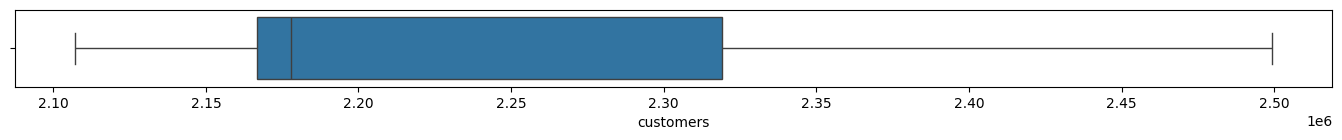

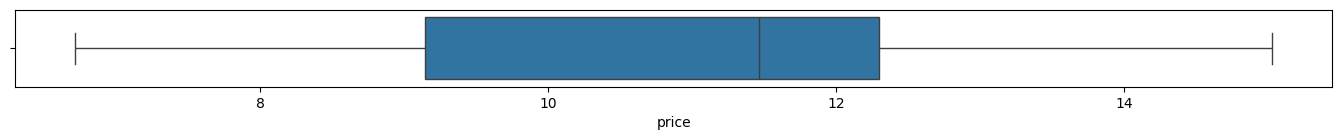

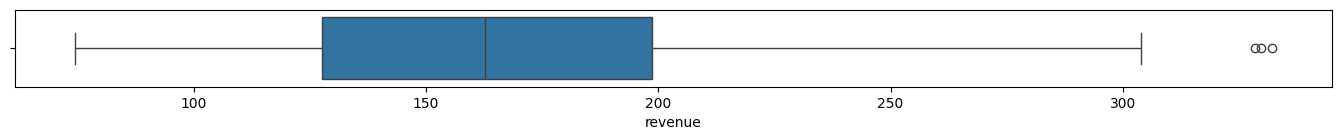

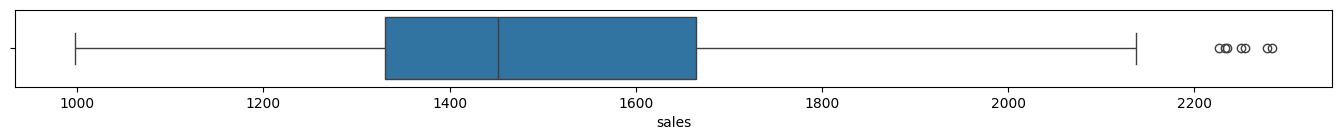

In [ ]:
data_handle_outliers = handling_outlier(data_handle_missing_value,0.25,0.75,1.5)
data_handle_outliers

### Train Test Split and Scalling

In [ ]:
data_handle_outliers

,year,month,customers,price,revenue,sales
0,2001.0,1.0,2166608.36,6.71,95.36042,1421.03141
1,2001.0,2.0,2166563.38,7.15,82.80805,1158.03618
2,2001.0,3.0,2166780.78,7.03,81.51754,1159.50126
3,2001.0,4.0,2167070.38,7.46,74.41964,997.27466
4,2001.0,5.0,2167471.47,7.84,79.05060,1008.52334
...,...,...,...,...,...,...
272,2023.0,9.0,2461390.00,15.03,260.46825,1733.05939
273,2023.0,10.0,2465232.00,14.54,210.70186,1449.19026
274,2023.0,11.0,2469419.00,14.61,206.53028,1413.49032
275,2023.0,12.0,2472310.00,14.15,246.10717,1739.45237


In [ ]:
def train_test_split_scalling(df, split_time, scaller):
    df['year_month'] = pd.to_datetime(df[['year', 'month']].assign(day=1)).dt.to_period('M')
    x_train = df.iloc[:len(df)-split_time, :]
    y_train = x_train["price"]
    x_train = x_train.drop(columns = "price")

    x_test = df.iloc[len(df)-split_time:, :]
    y_test = x_test["price"]
    x_test = x_test.drop(columns = "price")

    if scaller == "standard scaller":
        scaller = StandardScaler()

    elif scaller == "minmax scaller":
        scaller = MinMaxScaler()

    elif scaller == "robut scaller":
        scaller = RobustScaler()

    scalling = scaller
    x_train_scalled = scalling.fit_transform (x_train.drop(columns = "year_month"))
    x_test_scalled = scalling.transform(x_test.drop(columns = "year_month"))

    return x_train_scalled,x_test_scalled,y_train,y_test,x_train,x_test




In [ ]:
split_time = 24   # Equal with the number of the month for testing data

x_train_scalled,x_test_scalled,y_train,y_test,x_train,x_test = train_test_split_scalling(data_handle_outliers, split_time, 'minmax scaller')

## Machine Learning

### Linear Regression

In [ ]:
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
}

linear_regressor = LinearRegression()
grid_search = GridSearchCV(estimator=linear_regressor, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(x_train_scalled, y_train)
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)
best_linear_regressor = grid_search.best_estimator_
predictions_linear = best_linear_regressor.predict(x_test_scalled)
predictions_linear = predictions_linear.tolist()

print(predictions_linear)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters found:  {'copy_X': True, 'fit_intercept': True}
[13.07589026514847, 13.147809693428407, 13.011032866808957, 13.08720657329522, 14.059498443608074, 14.414941162484245, 14.424508056441237, 14.583433259069823, 13.816929436674961, 13.855209053438816, 13.989980269155627, 14.179915478560371, 13.908317348753869, 13.606704661642317, 13.162224444976571, 13.794850205515925, 14.18872256058202, 14.659835299989162, 14.640353600054665, 14.803460409267348, 13.944491823817977, 13.939818365316398, 14.116762782454654, 14.224701855864648]


### Random Forest

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_regressor = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(x_train_scalled, y_train)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Use the best estimator to make predictions
best_rf_regressor = grid_search.best_estimator_
predictions_rf = best_rf_regressor.predict(x_test_scalled)
predictions_rf = predictions_rf.tolist()

print(predictions_rf)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
[13.453699999999996, 13.437699999999996, 13.214199999999991, 13.496300000000002, 13.525199999999993, 13.520199999999997, 13.525899999999996, 13.642499999999998, 13.645300000000002, 13.5747, 13.573399999999994, 13.100100000000003, 13.33300000000001, 13.485699999999998, 13.193399999999992, 13.560700000000004, 13.509400000000003, 13.5361, 13.525299999999998, 13.641999999999998, 13.642900000000004, 13.582600000000005, 13.567399999999996, 13.427399999999993]


### XGBoost

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

xgb_regressor = XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(x_train_scalled, y_train)
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)
best_xgb_regressor = grid_search.best_estimator_
predictions_xgb = best_xgb_regressor.predict(x_test_scalled)
predictions_xgb = predictions_xgb.tolist()
print(predictions_xgb)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
[13.552960395812988, 13.706442832946777, 13.561907768249512, 13.643095970153809, 13.811917304992676, 13.733003616333008, 13.738033294677734, 13.967214584350586, 13.95852279663086, 13.697726249694824, 13.417207717895508, 12.986715316772461, 13.430707931518555, 13.549725532531738, 13.513498306274414, 13.615943908691406, 13.752601623535156, 13.706031799316406, 13.738033294677734, 13.969907760620117, 13.833157539367676, 13.742947578430176, 13.46576976776123, 13.45925521850586]


## Deep Learning

### MLP

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'max_iter': [200, 500, 1000]
}

mlp_regressor = MLPRegressor(random_state=42)

grid_search = GridSearchCV(estimator=mlp_regressor, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(x_train_scalled, y_train)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_mlp_regressor = grid_search.best_estimator_
predictions_mlp = best_mlp_regressor.predict(x_test_scalled)
predictions_mlp = predictions_mlp.tolist()

print(predictions_mlp)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters found:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}
[12.800477017752547, 12.839119889936873, 12.951076335528484, 13.002720622148994, 13.40304531313133, 13.566077922889201, 13.632481765147284, 13.903827140422795, 13.601631941126874, 13.521014169610094, 13.407697866276175, 13.391716734107492, 13.40817033232982, 13.223666931507955, 13.155934092930426, 13.549117661132113, 13.772002229750191, 13.876840507729709, 13.926424235621186, 14.167140616294866, 13.755134170045144, 13.733870453100538, 13.613735528054983, 13.499155809206199]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### LSTM

In [ ]:
X_train_reshaped = np.reshape(x_train_scalled, (x_train_scalled.shape[0], 1, x_train_scalled.shape[1]))
X_test_reshaped = np.reshape(x_test_scalled, (x_test_scalled.shape[0], 1, x_test_scalled.shape[1]))

# Define the model creation function
def create_model(optimizer='adam', units=50, activation='relu'):
    model = Sequential()
    model.add(LSTM(units=units, activation=activation, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mse')
    return model

model = KerasRegressor(model=create_model, batch_size = 16,epochs = 50,
                       optimizer = "adam",activation='relu',units = 50, verbose=0)

param_grid = {
    'batch_size': [16, 32],
    'epochs': [50, 100],
    'optimizer': ['adam', 'rmsprop'],
    'units': [50, 100],
    'activation': ['relu', 'tanh']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X_train_reshaped, y_train)
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_lstm_model = grid_search.best_estimator_
predictions_lstm = best_lstm_model.predict(X_test_reshaped)
predictions_lstm = predictions_lstm.tolist()

print(predictions_lstm)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters found:  {'activation': 'tanh', 'batch_size': 16, 'epochs': 100, 'optimizer': 'adam', 'units': 50}
[12.962393760681152, 13.171239852905273, 12.759978294372559, 12.990030288696289, 13.807023048400879, 14.420233726501465, 14.461034774780273, 13.930583953857422, 13.317505836486816, 13.580401420593262, 14.080710411071777, 13.623781204223633, 13.174932479858398, 13.355372428894043, 12.884696006774902, 13.144272804260254, 13.422908782958984, 14.450739860534668, 14.527140617370605, 13.971359252929688, 13.447754859924316, 13.443071365356445, 14.029725074768066, 13.762728691101074]


### RNN

In [ ]:
X_train_reshaped = np.reshape(x_train_scalled, (x_train_scalled.shape[0], 1, x_train_scalled.shape[1]))
X_test_reshaped = np.reshape(x_test_scalled, (x_test_scalled.shape[0], 1, x_test_scalled.shape[1]))

def create_model(optimizer='adam', units=50, activation='relu'):
    model = Sequential()
    model.add(SimpleRNN(units=units, activation=activation, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mse')
    return model

model = KerasRegressor(model=create_model, batch_size=16, epochs=50,
                       optimizer="adam", activation='relu', units=50, verbose=0)

param_grid = {
    'batch_size': [16, 32],
    'epochs': [50, 100],
    'optimizer': ['adam', 'rmsprop'],
    'units': [50, 100],
    'activation': ['relu', 'tanh']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X_train_reshaped, y_train)
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)


best_rnn_model = grid_search.best_estimator_
predictions_rnn = best_rnn_model.predict(X_test_reshaped)
predictions_rnn = predictions_rnn.tolist()

print(predictions_rnn)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters found:  {'activation': 'tanh', 'batch_size': 32, 'epochs': 100, 'optimizer': 'adam', 'units': 50}
[13.166574478149414, 13.459959030151367, 13.000850677490234, 13.318643569946289, 14.286506652832031, 14.960569381713867, 15.036230087280273, 14.514324188232422, 13.845806121826172, 14.183416366577148, 14.771760940551758, 13.768823623657227, 13.299123764038086, 13.566293716430664, 13.045099258422852, 13.381994247436523, 13.732585906982422, 14.906564712524414, 15.019723892211914, 14.459014892578125, 13.894073486328125, 13.912424087524414, 14.617376327514648, 13.948129653930664]


## Visualization

Linear Regression Evaluation Metrics:
R2 Score: -0.09314803038765129
Mean Absolute Percentage Error: 0.027089210770918398
Mean Absolute Error: 0.386824161822412
Mean Squared Error: 0.21165091868631244
Root Mean Squared Error: 0.46005534306897516



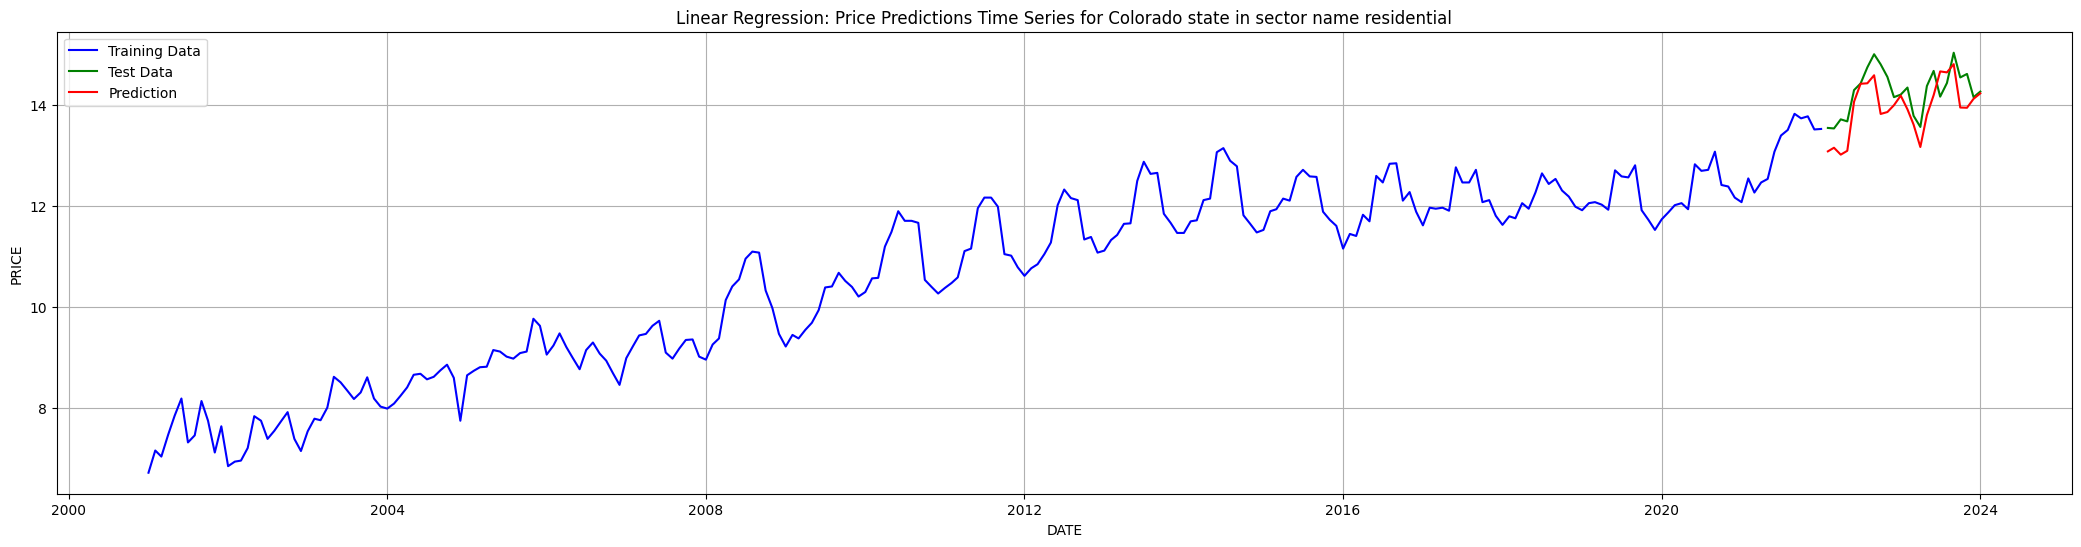

Random Forest Evaluation Metrics:
R2 Score: -2.893968535223293
Mean Absolute Percentage Error: 0.05411853227595607
Mean Absolute Error: 0.7827041666666679
Mean Squared Error: 0.7539345037500005
Root Mean Squared Error: 0.8682940191835946



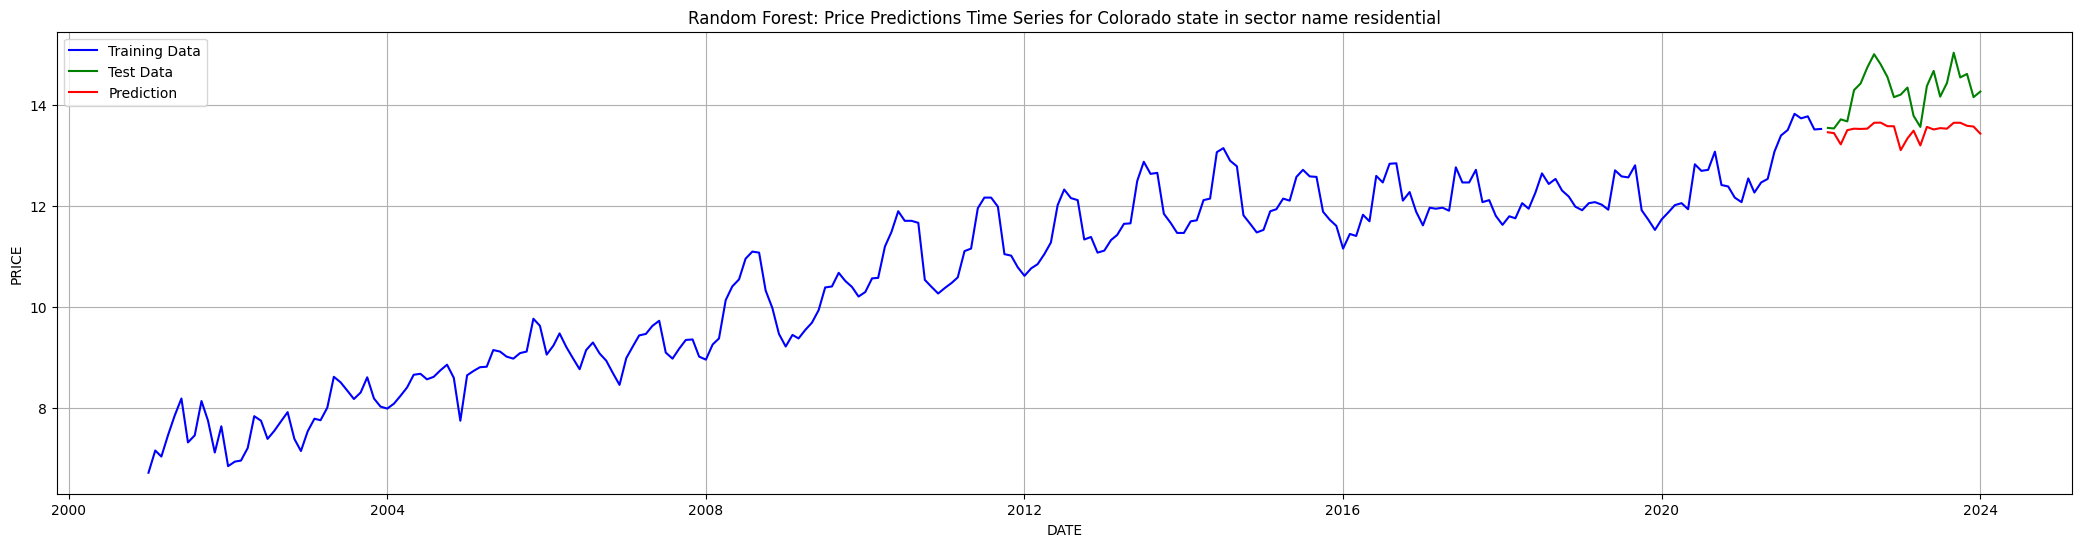

XGBoost Evaluation Metrics:
R2 Score: -1.7395843954985128
Mean Absolute Percentage Error: 0.044122064148873597
Mean Absolute Error: 0.6386032644907633
Mean Squared Error: 0.5304272962192735
Root Mean Squared Error: 0.7283043980502064



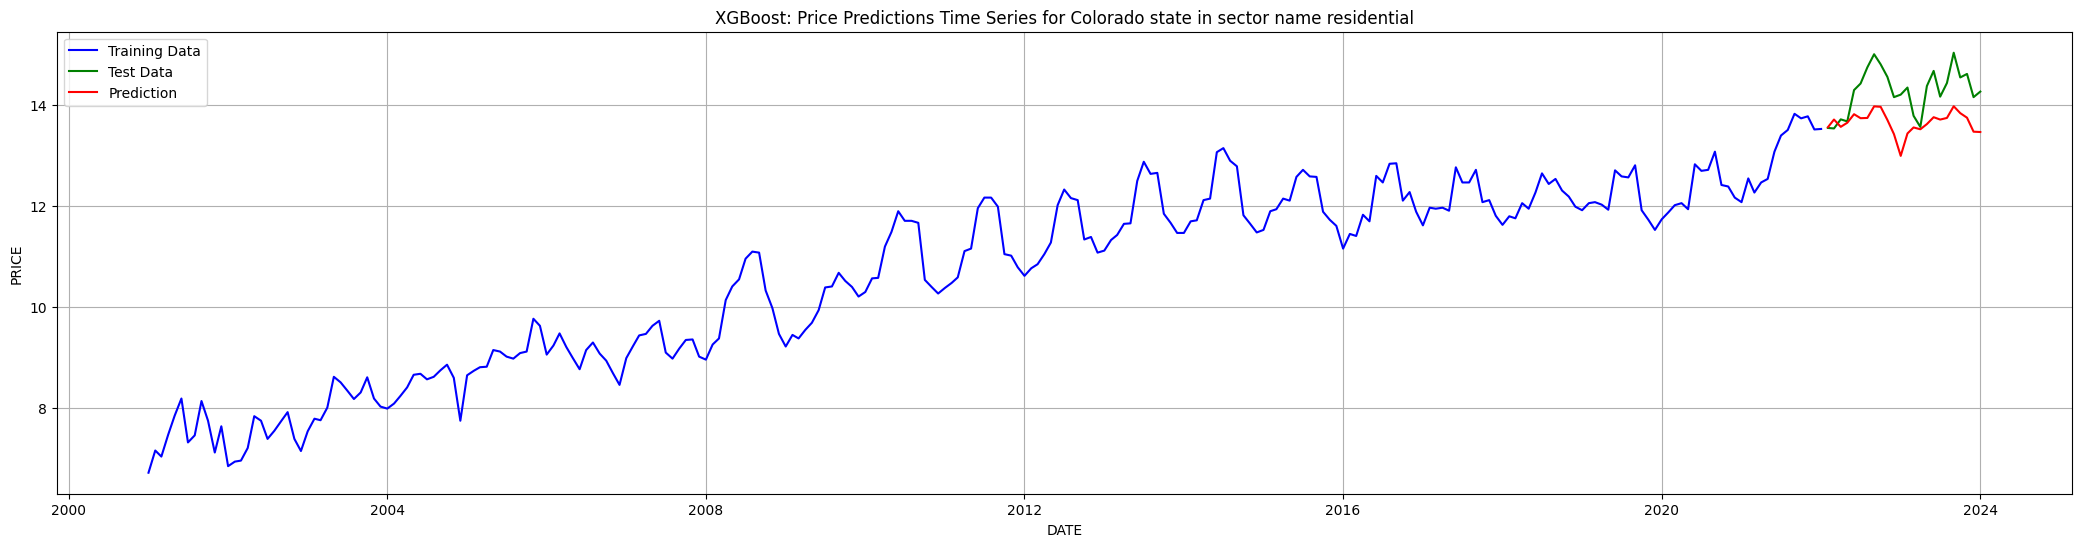

MultiLayer Perceptron Evaluation Metrics:
R2 Score: -2.4084732687320782
Mean Absolute Percentage Error: 0.054642428324297256
Mean Absolute Error: 0.7832466964257803
Mean Squared Error: 0.659934865719017
Root Mean Squared Error: 0.8123637520957081



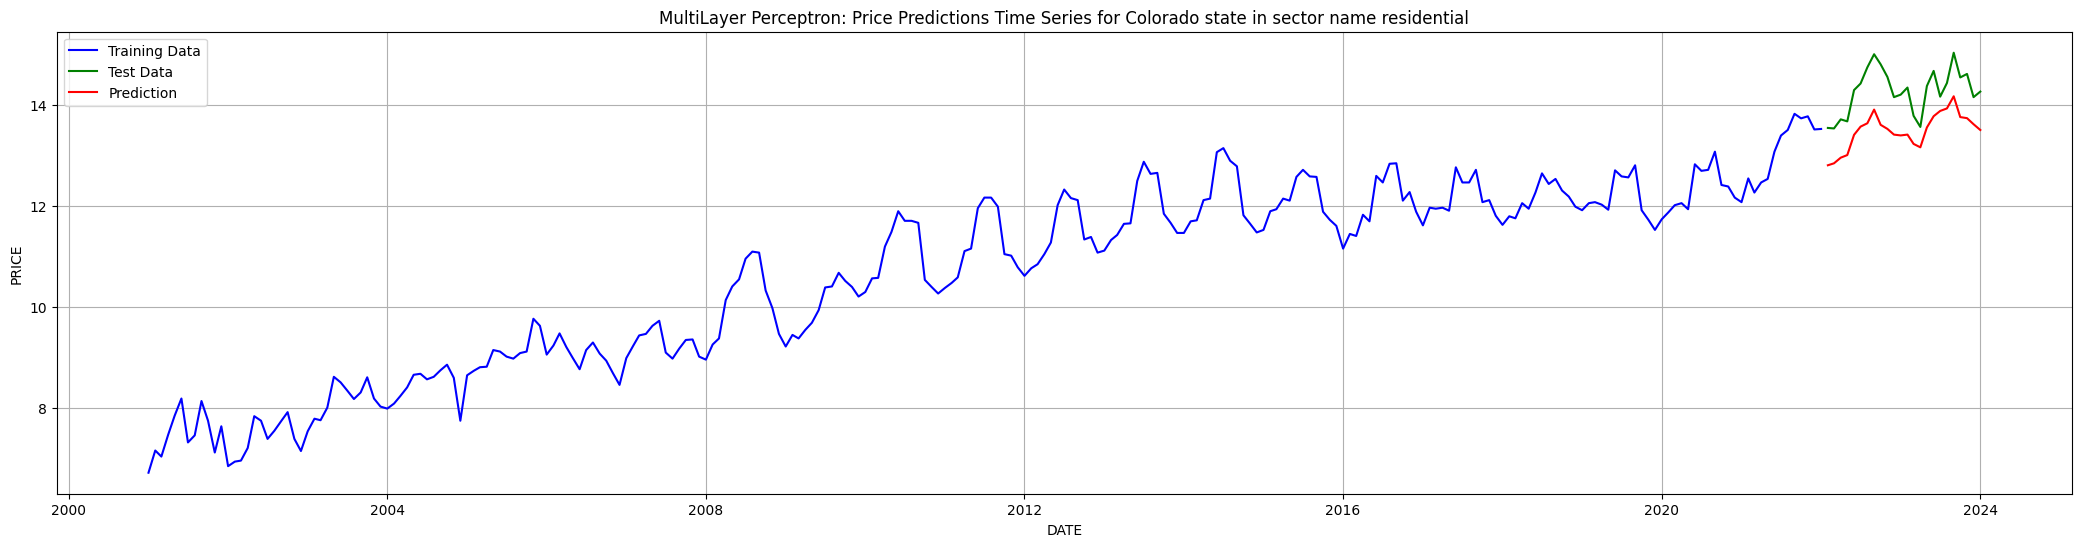

Long Short Term Memory Evaluation Metrics:
R2 Score: -2.4086459877416324
Mean Absolute Percentage Error: 0.048031714755370124
Mean Absolute Error: 0.6898587338129678
Mean Squared Error: 0.6599683068779731
Root Mean Squared Error: 0.8123843344612038



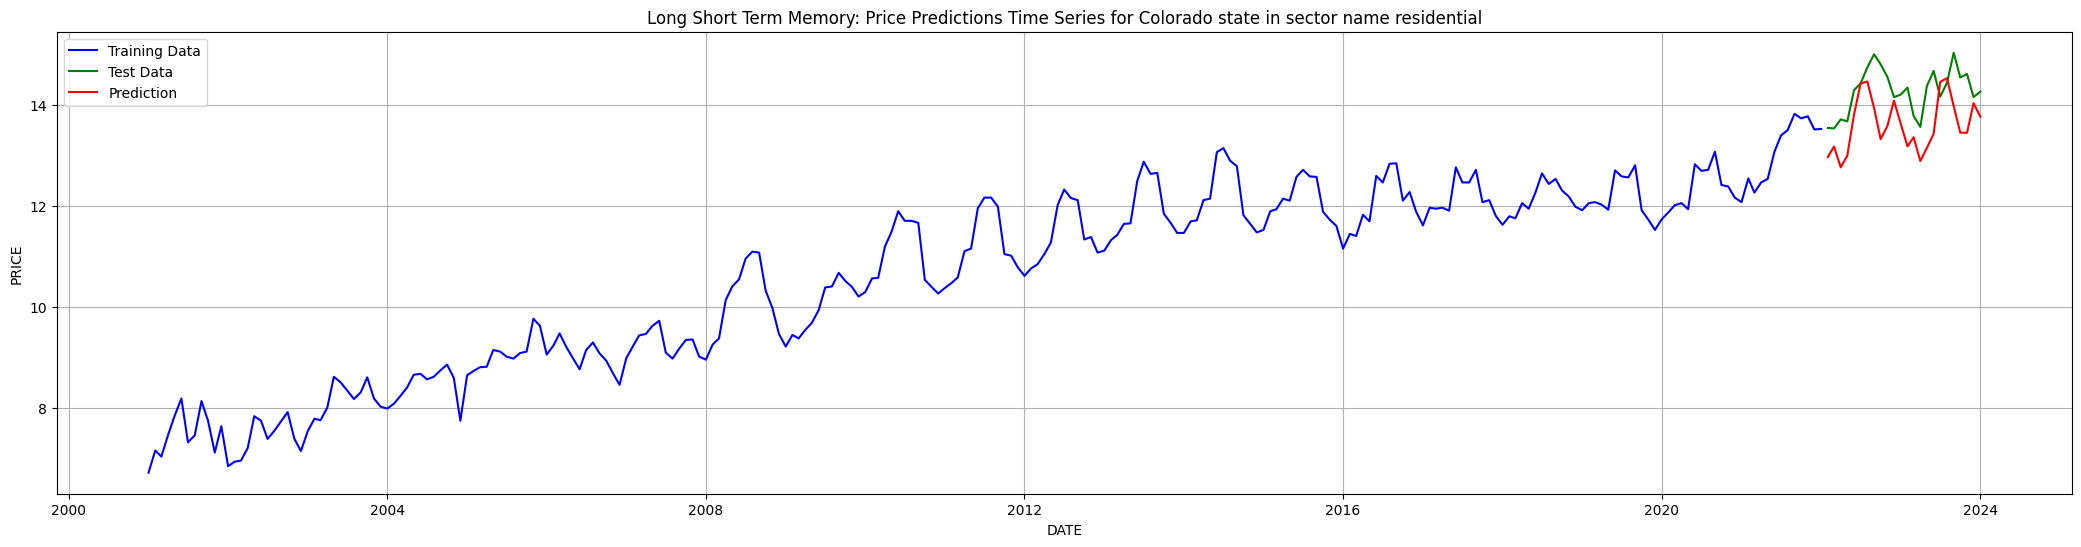

Recurrent Neural Network Evaluation Metrics:
R2 Score: -0.8730672240501076
Mean Absolute Percentage Error: 0.03757236022756577
Mean Absolute Error: 0.5386909008026121
Mean Squared Error: 0.3626557316220405
Root Mean Squared Error: 0.6022090431254254



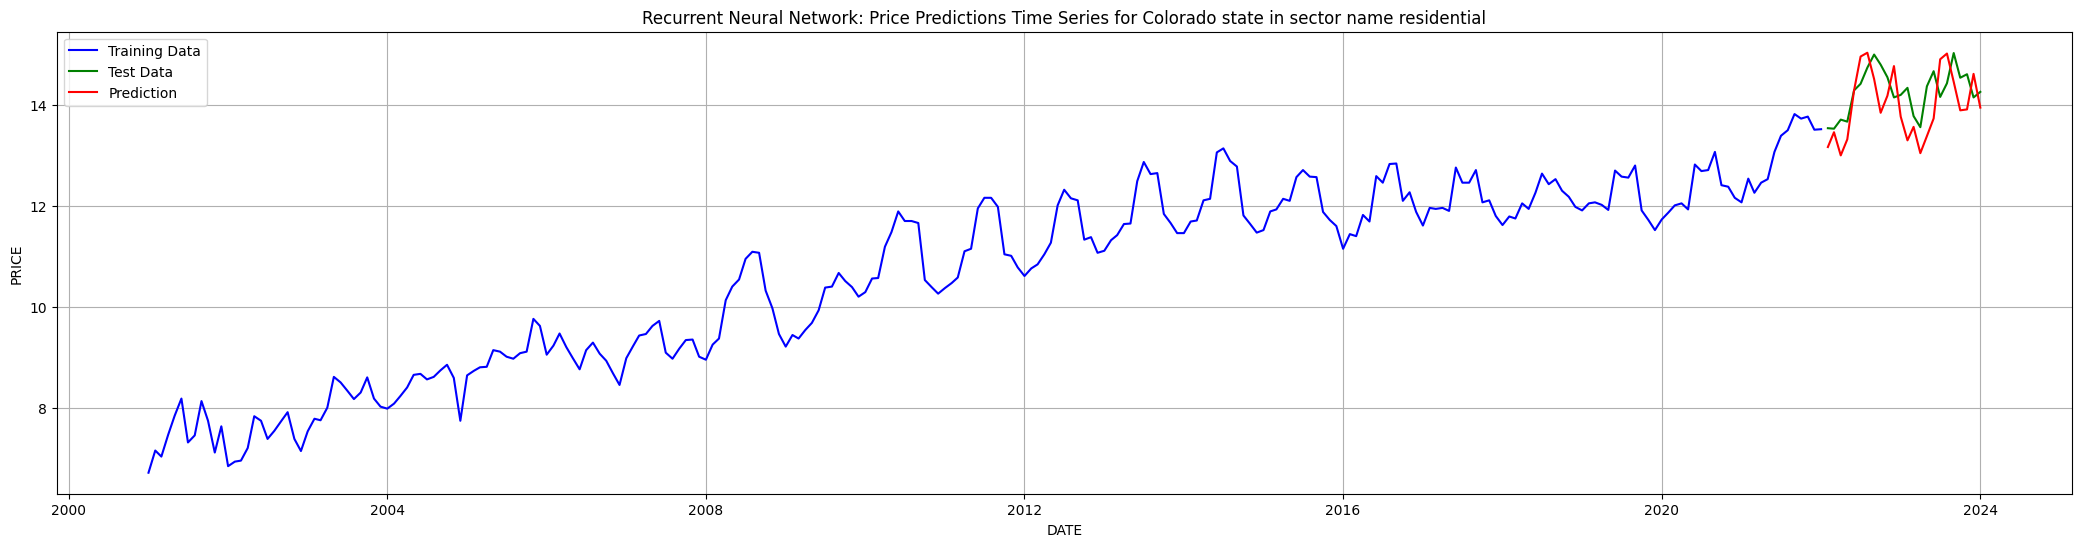

In [ ]:
train_visualization = 0 ## For train data

result = [predictions_linear, predictions_rf , predictions_xgb,predictions_mlp,predictions_lstm, predictions_rnn]
for i in range(len(result)):

    train_data = data_handle_outliers.iloc[:len(data_handle_outliers)-split_time, :]
    train_data = train_data[["year_month", "price"]]

    test_data = data_handle_outliers.iloc[len(data_handle_outliers)-split_time:, :]
    test_data = test_data[["year_month", "price"]]

    prediction = test_data["year_month"]
    prediction = pd.DataFrame({"year_month": prediction, "Prediction": result[i] })

    train_data["year_month"] = train_data["year_month"].dt.to_timestamp()
    test_data["year_month"] = test_data["year_month"].dt.to_timestamp()
    prediction["year_month"] = prediction["year_month"].dt.to_timestamp()

    if result[i] == predictions_linear:
        print("Linear Regression Evaluation Metrics:")

    elif result[i] == predictions_rf:
        print("Random Forest Evaluation Metrics:")

    elif result[i] == predictions_xgb:
        print("XGBoost Evaluation Metrics:")

    elif result[i] == predictions_mlp:
        print("MultiLayer Perceptron Evaluation Metrics:")

    elif result[i] == predictions_lstm:
        print("Long Short Term Memory Evaluation Metrics:")

    elif result[i] == predictions_rnn:
        print("Recurrent Neural Network Evaluation Metrics:")


    y_true = test_data["price"]
    y_pred = prediction["Prediction"]
    print(f"R2 Score: {r2_score(y_true, y_pred)}")
    print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_true, y_pred)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_true, y_pred)}")
    print(f"Mean Squared Error: {mean_squared_error(y_true, y_pred)}")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_true, y_pred))}")
    print()


    plt.figure(figsize=(26, 6))
    plt.plot(train_data["year_month"].iloc[train_visualization:], train_data["price"].iloc[train_visualization:], label="Training Data", color="blue")
    plt.plot(test_data["year_month"], test_data["price"], label="Test Data", color="green")
    plt.plot(prediction["year_month"], prediction["Prediction"], label="Prediction", color="red")


    if result[i] == predictions_linear:
        plt.title(f"Linear Regression: Price Predictions Time Series for {state} state in sector name {sector_name}")

    elif result[i] == predictions_rf:
        plt.title(f"Random Forest: Price Predictions Time Series for {state} state in sector name {sector_name}")

    elif result[i] == predictions_xgb:
        plt.title(f"XGBoost: Price Predictions Time Series for {state} state in sector name {sector_name}")

    elif result[i] == predictions_mlp:
        plt.title(f"MultiLayer Perceptron: Price Predictions Time Series for {state} state in sector name {sector_name}")

    elif result[i] == predictions_lstm:
        plt.title(f"Long Short Term Memory: Price Predictions Time Series for {state} state in sector name {sector_name}")

    elif result[i] == predictions_rnn:
        plt.title(f"Recurrent Neural Network: Price Predictions Time Series for {state} state in sector name {sector_name}")


    plt.xlabel("DATE")
    plt.ylabel("PRICE")
    plt.legend()
    plt.grid(True)
    plt.show()